## DALL·E-3 Image Generation

Documentation: https://platform.openai.com/docs/guides/images/introduction  
OpenAI Cookbook: https://cookbook.openai.com/articles/what_is_new_with_dalle_3

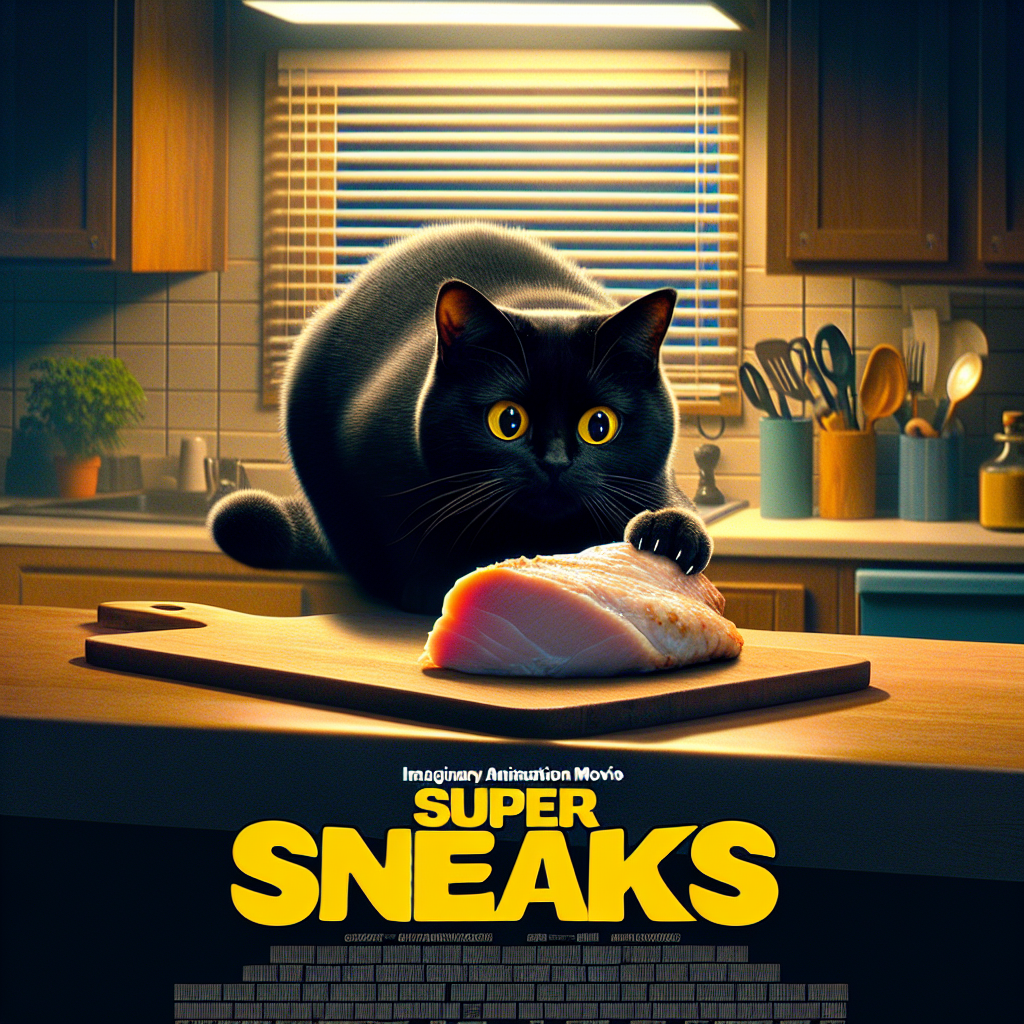


Original Prompt: Illustrate an image in the style of a fake Disney-Pixar movie poster, showcasing a soft black cat with silky sleek fur and bright round yellow eyes perched on the bar countertop in a home kitchen, reaching down to steal a piece of chicken breast from the cutting board below. Include the words 'Super Sneaks' as the title of the movie.

Adjusted Prompt: Create a movie poster reminiscent of animated films from the early 20th century, featuring a soft, sleek-furred black cat with bright, round yellow eyes perched on the countertop of a home kitchen. In the image, the cat is reaching down to steal a piece of chicken breast from the cutting board below. Include the words 'Super Sneaks' as the title of the film. Give the whole artwork a playful and inviting ambience, similar to the aesthetic of vintage animated movies. Use bright and vibrant shades to accentuate the details, and contrast to highlight the cat's mischievous act.

Parameters: {'model': 'dall-e-3', 'size': '1024

In [1]:
import os
from openai import OpenAI
from PIL import Image
import requests
import time

client = OpenAI()

# Prompt
original_prompt = '''Illustrate an image in the style of a fake Disney-Pixar movie poster, showcasing a soft black cat with silky \
sleek fur and bright round yellow eyes perched on the bar countertop in a home kitchen, reaching down to steal a piece of chicken \
breast from the cutting board below. Include the words 'Super Sneaks' as the title of the movie.'''

# Parameters
params_dict = {
    'model': 'dall-e-3',  # 'dall-e-2' or 'dall-e-3'
    'size': '1024x1024',  # '1024x1024', '1792x1024', or '1024x1792' for dall-e-3
    'style': 'vivid',     # 'natural' or 'vivid'
    'quality': 'standard' # 'standard' or 'hd'
    }

response = client.images.generate(prompt=original_prompt, **params_dict)

# Retrieve prompt + image
adjusted_prompt = response.data[0].revised_prompt
image = Image.open(requests.get(response.data[0].url, stream=True).raw)

# Create directory
savedir = './Images/'
os.makedirs(savedir, exist_ok=True)

# Save image
savename = f'{time.time():.0f}'
image.save(f'{savedir}{savename}.png', format='png')

# Save prompt
with open(f'{savedir}{savename}.txt', 'w') as f:
    f.write(f'Original Prompt: {original_prompt}\n\n')
    f.write(f'Adjusted Prompt: {adjusted_prompt}\n\n')
    f.write(f'Parameters: {params_dict}')

# Show results
display(image)
print(f'\nOriginal Prompt: {original_prompt}')
print(f'\nAdjusted Prompt: {adjusted_prompt}')
print(f'\nParameters: {params_dict}')